# 데이터셋 준비 (간단한 더미 데이터)

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
days = pd.date_range("2024-01-01", periods=30)
sales = np.random.randint(30, 80, size=30)  # 일별 커피 판매량

df = pd.DataFrame({"date": days, "sales": sales})
print(df.head())

print("numpy:", np.__version__)
print("pandas:", pd.__version__)

        date  sales
0 2024-01-01     68
1 2024-01-02     58
2 2024-01-03     44
3 2024-01-04     72
4 2024-01-05     37
numpy: 2.3.3
pandas: 2.3.2


# 간단한 예측 모델 적용 (Prophet)

Note: you may need to restart the kernel to use updated packages.


,ds,y
0,2024-01-01,68
1,2024-01-02,58
2,2024-01-03,44
3,2024-01-04,72
4,2024-01-05,37
5,2024-01-06,50
6,2024-01-07,68
7,2024-01-08,48
8,2024-01-09,52
9,2024-01-10,40


21:32:49 - cmdstanpy - INFO - Chain [1] start processing
21:32:49 - cmdstanpy - INFO - Chain [1] done processing


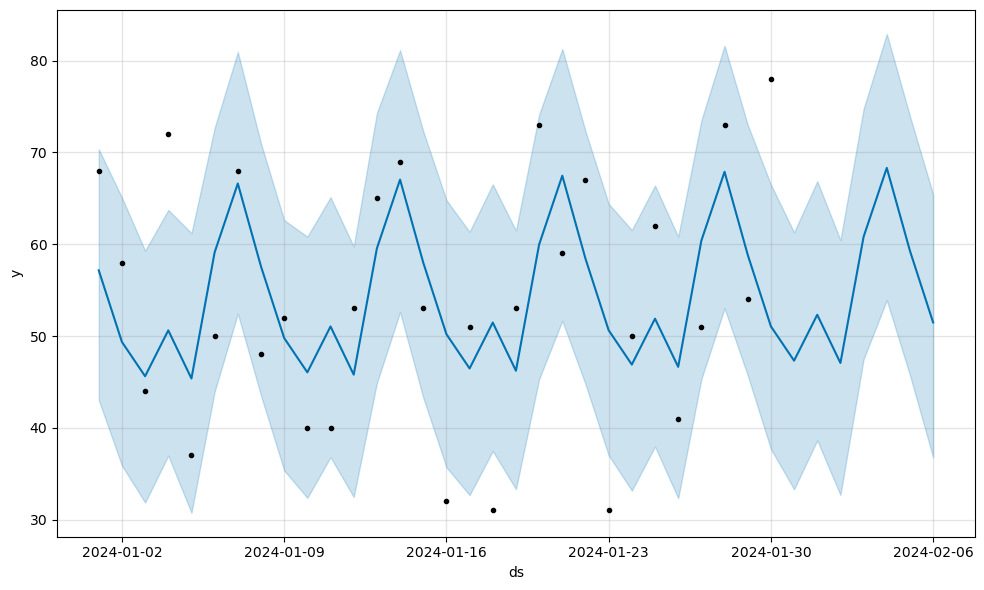

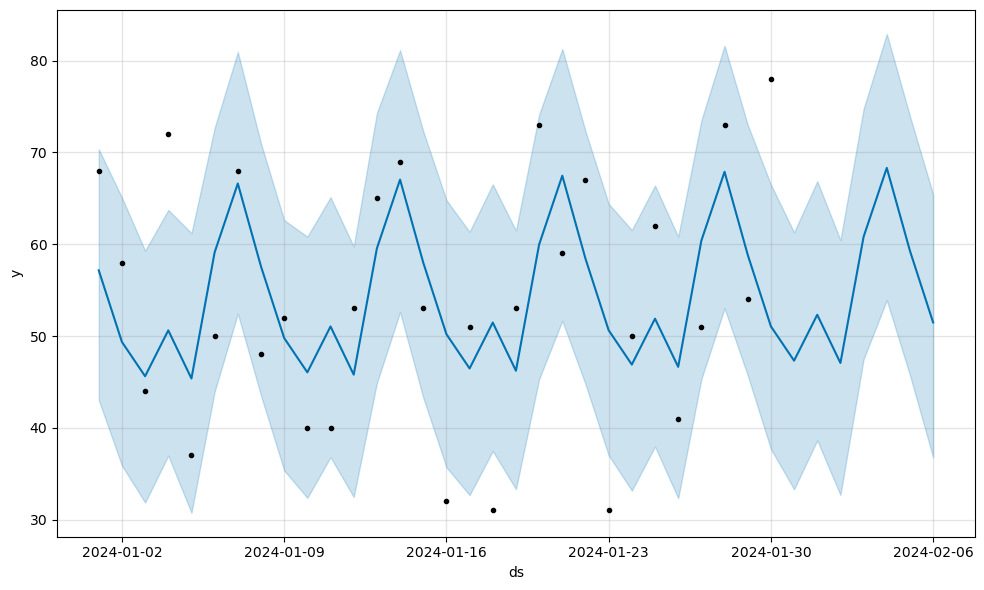

In [5]:
%pip install prophet
from prophet import Prophet

df_prophet = df.rename(columns={"date": "ds", "sales": "y"})
display(df_prophet)
model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=7)  # 7일 예측
forecast = model.predict(future)
model.plot(forecast)


# 상권 API -> Prophet

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
# from xgboost import XGBRegressor
import shap

# API 호출 설정
API_KEY = "3d583a9839c8fee7ab801e0caa33c90104a20066db91063b69f2accaf3b26884"
endpoint = "https://apis.data.go.kr/B553077/api/open/sdsc2"
params = {
    "serviceKey": API_KEY,
    "type": "json",
    # 아래는 API 문서에 있는 필수/선택 파라미터들
    "pageNo": 1,
    "numOfRows": 1000,
    "divld": "ctprvnCd",       # 예시
    "key": "11",             # 예시
    "indsLclsCd": "I2",           # 예: 시작일
    "indsMclsCd": "2024I2120630",             # 예: 종료일
    "indsSclsCd" : "I21201",
}

resp = requests.get(endpoint, params=params)
print("응답상태:", resp.status_code)
if resp.status_code != 200:
    raise Exception("API 호출 실패")

data = resp.json()  # 또는 resp.text + json parsing

# 예: JSON 구조가 {"response": {"body": {"items": {"item": [ {...}, {...}, ... ] } } } }
items = data["response"]["body"]["items"]["item"]

# 시계열 데이터를 위한 DataFrame 구성 (여기서는 예: 날짜(date) + 매출(sales) 가 있다고 가정)
df = pd.DataFrame(items)
display(df);
# 컬럼 이름은 API 문서 보고 바꿔 주세요
# 예: 날짜 필드가 "date"로 되어 있다면, 다음과 같이:
# df = df.rename(columns={
#     "date": "ds",
#     "sales": "y"
# })

# 날짜 문자열 → datetime
# df["ds"] = pd.to_datetime(df["ds"], format="%Y%m%d")  # 형식은 API 문서 참고

# y 컬럼은 숫자형으로
# df["y"] = pd.to_numeric (df["y"], errors="coerce")

# 결측치 제거
# df = df.dropna(subset=["y", "ds"])

# Prophet 모델 학습
# model = Prophet()
# model.fit(df)

# 미래 예측 (예: 다음 7일)
# future = model.make_future_dataframe(periods=7)
# forecast = model.predict(future)

# 시각화
# fig1 = model.plot(forecast)
# plt.title("예측 결과")
# plt.xlabel("날짜")
# plt.ylabel("y 값")
# plt.show()

# # 구성 요소(trend, seasonality 등) 시각화
# fig2 = model.plot_components(forecast)
# plt.show()


c:\Users\edukd\miniconda3\envs\NH-venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


SSLError: HTTPSConnectionPool(host='apis.data.go.kr', port=443): Max retries exceeded with url: /B553077/api/open/sdsc2?serviceKey=3d583a9839c8fee7ab801e0caa33c90104a20066db91063b69f2accaf3b26884&type=json&pageNo=1&numOfRows=1000&divld=ctprvnCd&key=11&indsLclsCd=I2&indsMclsCd=2024I2120630&indsSclsCd=I21201 (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_ILLEGAL_PARAMETER] ssl/tls alert illegal parameter (_ssl.c:1016)')))